In [1]:
from casatasks import *
# from casatools import *
import casatools
import os


# from calibration_script_v3 import *
from casaplotms import plotms
from casaviewer.imview import imview
import glob

msmd = casatools.msmetadata()
ms = casatools.ms()
tb = casatools.table()
import matplotlib as mpl
def reset_rc_params():
    mpl.rcParams.update({'font.size': 14, 
        'mathtext.fontset': 'stix',
        "text.usetex": False,
        "font.family": "sans-serif",
        "font.family": "sans",
        "font.serif": ["Exo 2"],
        "font.sans-serif": ["Exo 2"],
        'font.family': 'STIXGeneral', 
        'xtick.labelsize':16,
        'ytick.labelsize':16,
        'axes.labelsize' : 16,
        'xtick.major.width':1,
        'ytick.major.width':1,
        'axes.linewidth':1,
        'lines.linewidth':2,
        'legend.fontsize':14,
        "grid.linestyle":'--',                
        })
    pass
reset_rc_params()

In [2]:
import sys
sys.path.append('../libs/')
import libs as mlibs
# from libs import *



                                                          ..___|**_
                                                  .|||||||||*+@+*__*++.
                                              _||||.           .*+;].,#_
                                         _|||*_                _    .@@@#@.
                                   _|||||_               .@##@#| _||_
   Radio Morphen              |****_                   .@.,/\..@_.
                             #///#+++*|    .       .@@@;#.,.\@.
                              .||__|**|||||*||*+@#];_.  ;,;_
 Geferson Lucatelli                            +\*_.__|**#
                                              |..      .]]
                                               ;@       @.*.
                                                #|       _;]];|.
                                                 ]_          _+;]@.
                                                 _/_             |]\|    .  _
                                              ...._@* __ .

In [3]:
# from plotting import *
# from read_data import *
# from image_operations import *


In [4]:
# imview()b

In [62]:
def compute_image_stats(path,
                        image_list,
                        image_statistics,
                        prefix='',
                        show_figure=True):
    """
    This function will compute statistics of a cleaned image from a wsclean run
    at a given self-cal step (provided an image prefix). It will also store
    associated model and residual images.

    Parameters
    ----------
    path : str
        Path to the image files.
    image_list : list
        List to store  the image names of each self-cal step.
    image_statistics : dict
        Dictionary to store the statistics of the images at a given self-cal step.
        It can be an existing dictionary.
    prefix : str
        Prefix of the image files.

    """
    file_list = glob.glob(f"{path}*{prefix}*MFS-image.fits")
    file_list.sort(key=os.path.getmtime, reverse=False)
    try:
        image_list[prefix] = file_list[-1]
    except:
        image_list[prefix] = file_list
    image_list[prefix+'_residual'] = image_list[prefix].replace(
        'MFS-image.fits', 'MFS-residual.fits')
    image_list[prefix+'_model'] = image_list[prefix].replace(
        'MFS-image.fits', 'MFS-model.fits')

    sigma = 6.0
    

    level_stats = mlibs.level_statistics(image_list[prefix],sigma=sigma)
    image_stats = mlibs.get_image_statistics(imagename=image_list[prefix],
                                             residual_name = image_list[prefix+'_residual'],
                                             dic_data=level_stats,
                                             sigma_mask=sigma)
    img_props = mlibs.compute_image_properties(image_list[prefix],
                                               image_list[prefix+'_residual'],
                                               results = image_stats,
                                               sigma_mask = sigma,
                                               show_figure=show_figure)[-1]



    image_statistics[prefix] = img_props
    return(image_statistics,image_list)

def create_mask(imagename,rms_mask,sigma_mask,mask_grow_iterations,PLOT=False):
    original_mask,dilated_mask = mlibs.mask_dilation(imagename,
                                                     PLOT=PLOT,
                                                     rms=rms_mask,
                                                     sigma=sigma_mask,
                                                     iterations=mask_grow_iterations)

    mask = dilated_mask
    mask_wslclean = mask * 1.0  # mask in wsclean is inverted
    mask_name = imagename.replace('.fits', '') + '_mask.fits'
    mlibs.pf.writeto(mask_name, mask_wslclean, overwrite=True)
    return(mask_name)


def run_wsclean(g_name, imsize='2048', imsizey='2048',cell='0.06asec',
                robust=0.5,base_name=None,
                savemodel=False,shift=None,
                nsigma_automask='4.0', nsigma_autothreshold='2.0',
                datacolumn='DATA',mask=None,
                niter=1000,quiet=True,
                with_multiscale=False, scales='0,5,20,40',
                uvtaper=[]):


    g_vis = g_name + '.ms'
    if imsizey is None:
        imsizey = imsize
    if base_name is None:
        base_name  = 'final_image'
    else:
        base_name = base_name



    os.system("export OPENBLAS_NUM_THREADS=1 && python ../selfcal/imaging_with_wsclean.py --f " +
              g_name + " --sx "
              + str(imsize) + " --sy " + str(imsizey) + " --niter "
              + str(niter) + " --data " + datacolumn + " --cellsize " + cell
              + ' --nsigma_automask ' + nsigma_automask + ' --mask '+str(mask)
              + ' --nsigma_autothreshold ' + nsigma_autothreshold
              + ' --scales ' + scales
              # +' --opt_args '+ opt_args
              +' --quiet '+ str(quiet) + ' --with_multiscale '+str(with_multiscale)
              + ' --shift ' + str(shift)
              + " --r " + str(robust) + " --t "+str(uvtaper)
              + " --update_model " + str(savemodel) + " --save_basename " + base_name)
    
    
    

In [6]:
path = '/media/sagauga/starbyte/LIRGI_Sample_done/VLA-Archive/A_config/23A-324/C_band/MCG12/imaging_final/'
name = path + 'MCG12-02-001.calibrated.avg12s_trial_1'
vis = name + '.ms'

++++====>>>> Deconvolver Options:
 -multiscale-scale-bias 0.8 -multiscale-gain 0.05  -multiscale-scales 0,5,20,40 -multiscale-max-scales 6 
 ++>>   -multiscale-scale-bias 0.8 -multiscale-gain 0.05  -multiscale-scales 0,5,20,40 -multiscale-max-scales 6 
 ++>> Using Multiscale deconvolver.
  1.0
Using mtmfs method.
final_image_MCG12-02-001.calibrated.avg12s_trial_1_2048x2048_0.06asec_100000.briggs.multiscale..1.0
Command to be executed by Singularity > WSClean: 
singularity exec --nv --bind /media/sagauga/starbyte/LIRGI_Sample_done/VLA-Archive/A_config/23A-324/C_band/MCG12/imaging_final/:/mnt /media/sagauga/xfs_evo/morphen_stable_cpu_v2.simg mpirun -np 8 wsclean-mp -name /mnt/final_image_MCG12-02-001.calibrated.avg12s_trial_1_2048x2048_0.06asec_100000.briggs.multiscale..1.0 -size 2048 2048 -scale 0.06asec  -mgain 0.3 -gain 0.05 -nmiter 500 -super-weight 9.0  -niter 100000 -weight briggs 1.0  -auto-mask 3.0  -auto-threshold 1.5  -multiscale  -multiscale-scale-bias 0.8 -multiscale-gain 0.0

Authorization required, but no authorization protocol specified
Authorization required, but no authorization protocol specified


Node 5, PID 612087 on stardust
Node 6, PID 612088 on stardust
Node 7, PID 612090 on stardust
Node 0, PID 612076 on stardust
Node 1, PID 612078 on stardust
Node 2, PID 612079 on stardust
Node 3, PID 612081 on stardust
Node 4, PID 612086 on stardust
2024-Jan-28 23:39:21.102427 Process 2 finished.
2024-Jan-28 23:39:21.102428 Process 3 finished.
2024-Jan-28 23:39:21.102428 Process 5 finished.
2024-Jan-28 23:39:21.102429 Process 6 finished.
2024-Jan-28 23:39:21.102428 Process 4 finished.
2024-Jan-28 23:39:21.102428 Process 7 finished.
2024-Jan-28 23:39:21.102418 Process 0 finished.
2024-Jan-28 23:39:21.102459 Process 1 finished.
Exec time cleaning= 891.5588989257812 s
 ==>  Dilation size is 5 [px]
 ==>  Dilation size is 5 [px]


100%|██████████| 10/10 [00:00<00:00, 16.02it/s]


 ==>  Dilation size is 5 [px]
256 1024 768


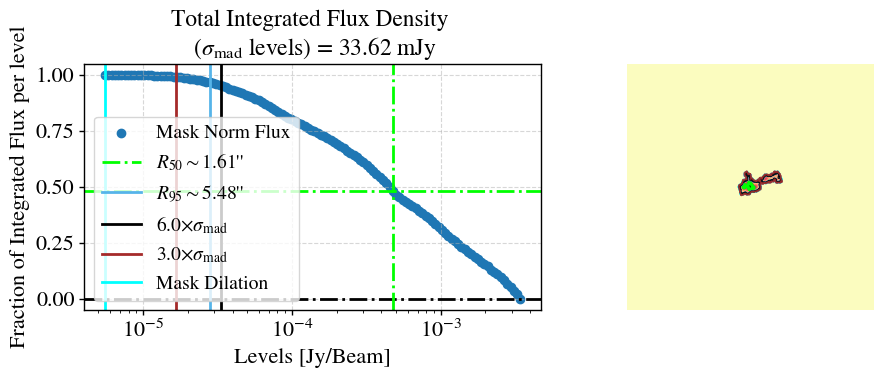

 ==>  Dilation size is 5 [px]


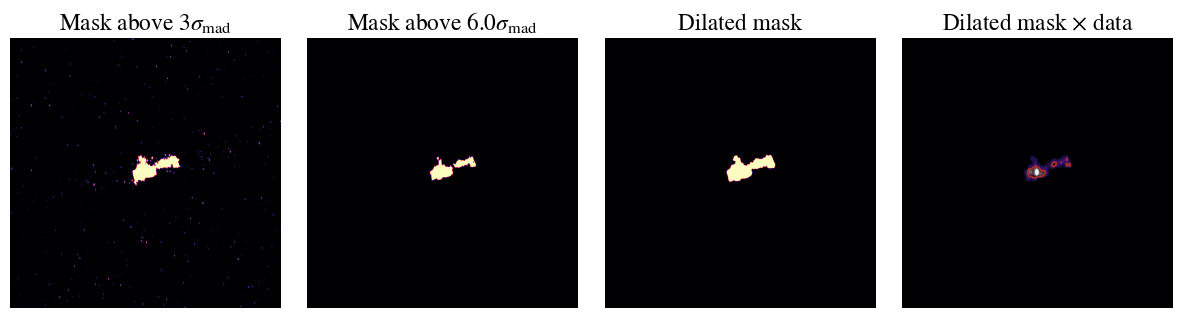

In [31]:
prefix = 'final_image'
run_wsclean(name, robust='1.0',
            imsize='2048', 
            imsizey='2048', 
            cell='0.06asec',
            base_name=prefix,
            nsigma_automask='3.0',
            nsigma_autothreshold='1.5',
            quiet=True,
            with_multiscale=True,
            scales='0,5,20,40',
            datacolumn='DATA',
            uvtaper=[],
            niter=100000)


image_statistics,image_list = compute_image_stats(path=os.path.dirname(name) + '/',
                                                image_list={},
                                                image_statistics={},
                                                prefix=prefix)

rms_mask = mlibs.mad_std(mlibs.ctn(image_list['final_image_residual']))
mask_name = create_mask(image_list[prefix],
                    rms_mask=rms_mask,
                    sigma_mask=6.0,
                    mask_grow_iterations=2,
                    PLOT=True)

  >> Center -->  [1021 1029    0    0]


<Axes: xlabel='Offset [arcsec]'>

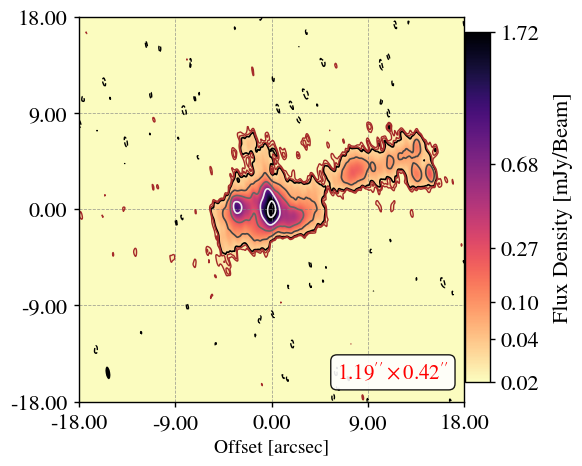

In [81]:
mlibs.eimshow(image_list['final_image'],
              rms=mlibs.mad_std(mlibs.ctn(image_list['final_image_residual'])),
              crop=True,box_size=300,add_beam=True)

In [76]:
image_statistics

{'final_image': {'#imagename': 'final_image_MCG12-02-001.calibrated.avg12s_trial_1_2048x2048_0.06asec_100000.briggs.multiscale..1.0-MFS-image.fits',
  'peak_of_flux': 0.0034372424706816673,
  'total_flux': 0.031937405936029874,
  'inner_flux': 0.019486057621249858,
  'low_flux': 0.001843846025427811,
  'mid_flux': 0.010607502289352205,
  'uncertain_flux': 0.0,
  'inner_flux_f': 0.6101327596950149,
  'low_flux_f': 0.05773311799715374,
  'mid_flux_f': 0.33213412230783135,
  'uncertain_flux_f': 0.0,
  'number_of_beams': 203.52677012486942,
  'n_beams_inner': 22.289886856937798,
  'n_beams_mid': 82.73789215287995,
  'n_beams_low': 42.084213862208266,
  'n_beams_uncertain': 0.0,
  'max_im': 0.0034372424706816673,
  'min_im': -2.5302691938122734e-05,
  'rms_im': 3.3600460461511954e-05,
  'rms_box': 5.323515333260313e-06,
  'sigma_im': 3.357598407667379e-05,
  'sigma_box': 5.314861324605213e-06,
  'flux_im': 0.033896147909955154,
  'flux_box': 8.065039650367516e-05,
  'q_sq': 3975.99309889816

In [64]:
df_results = mlibs.pd.DataFrame(image_statistics).T

In [75]:
f"{(df_results['total_flux_mask'].values[0]*1000):.2f} +/- {(df_results['flux_error_res_2'].values[0]*1000):.2f} mJy"

'33.63 +/- 1.17 mJy'